# (3.12) Exercise:

1. Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set)
2. Perform a similar alanlaysis as above on this dataset with the following sections:
* High level statistics of the dataset: number of points, numer of   features, number of classes, data-points per class.
* Explain our objective. 
* Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification.
* Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.
* Write your observations in english as crisply and unambigously as possible. Always quantify your results.

In [91]:
import warnings

warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
 

habermandataset = pd.read_csv('haberman.csv')
habermandataset.head(5)

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [6]:
print(habermandataset.shape)
print(habermandataset.columns)

(306, 4)
Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [94]:
#Converting the status column from numeric to string
habermandataset['status'] = habermandataset['status'].apply(lambda x: 'Survived' if x == 1 else 'Dead')

In [74]:
habermandataset['status'].value_counts()

Survived    225
Dead         81
Name: status, dtype: int64

Dataset has 2 classes (Survived and Dead). From the above data we can conclude that the dataset is imbalanced.

In [46]:
habermandataset.describe()

,age,year,nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


# OBJECTIVE
Determine the features(age,year,nodes) which helps in the classification

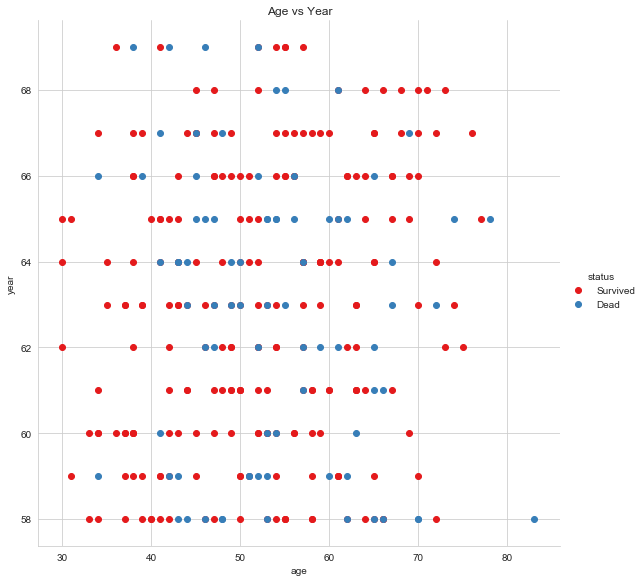

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid");
sns.FacetGrid(habermandataset,hue="status", size=8,palette="Set1") \
   .map(plt.scatter, "age", "year") \
   .set(title='Age vs Year')\
   .add_legend();
plt.show();

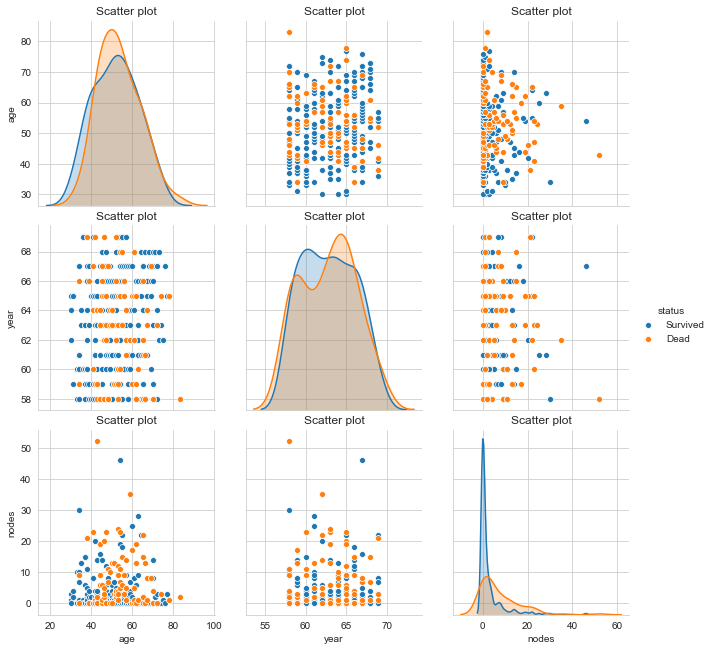

In [137]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(habermandataset, hue="status", size=3).set(title='Scatter plot');
plt.show()

Due to large amount of overlap, it is difficult to make any conclusion based on the scatter plots.

# HISTOGRAMS AND PDF'S

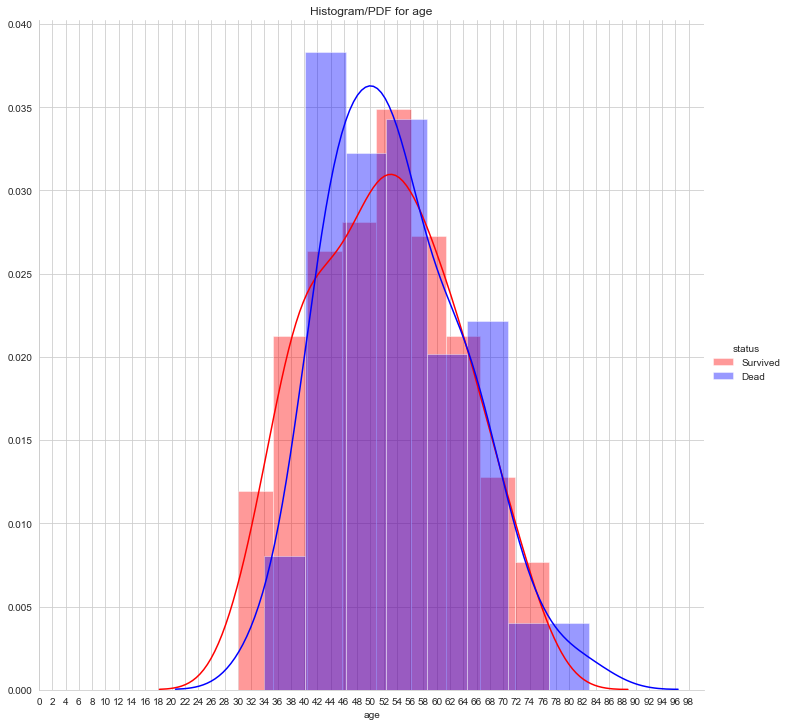

In [130]:
sns.FacetGrid(habermandataset, hue="status",palette = ['Red','Blue'],size=10) \
   .map(sns.distplot, "age") \
   .set(xticks=np.arange(0,100,2),title='Histogram/PDF for age') \
   .add_legend();
plt.show();

From the above density plot we observe that the people of age 30 to 34 are more likely to survive, and people above the age of 76 are more likely to die.  
From the age 34 to 76 there is a lot of overlap between people who survived and those who died and no classification can be made just based on the age.

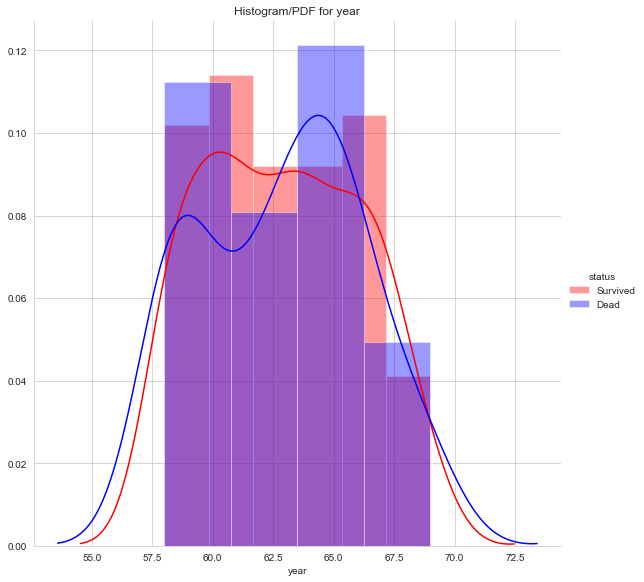

In [129]:
sns.FacetGrid(habermandataset, hue="status",palette = ['Red','Blue'],size=8) \
   .map(sns.distplot, "year") \
   .set(title='Histogram/PDF for year')\
   .add_legend();
plt.show();

There cannot be any classification made based on the year, as each year has both survivors and people who died.

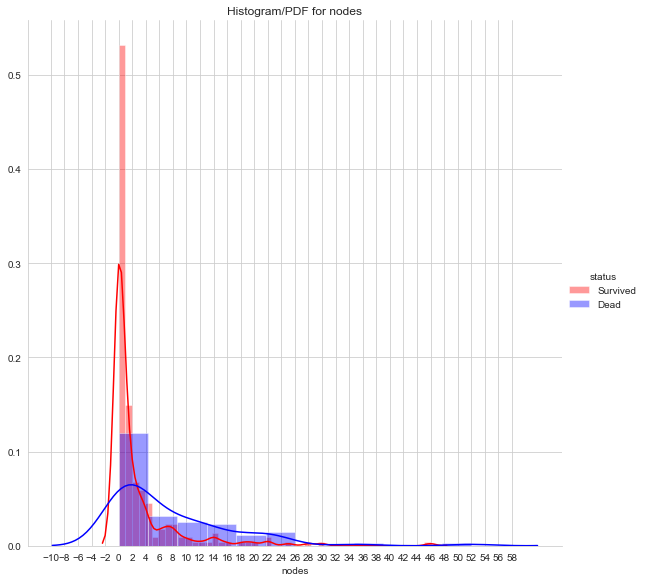

In [127]:
sns.FacetGrid(habermandataset, hue="status",palette = ['Red','Blue'],size=8) \
   .map(sns.distplot, "nodes") \
   .set(xticks=np.arange(-10,60,2),title='Histogram/PDF for nodes')\
   .add_legend();
plt.show();

There is a high concentration of people who survived where nodes value is close to 0(0-2) and the it reduces drastically as the value of nodes increases. 

# BOX PLOTS

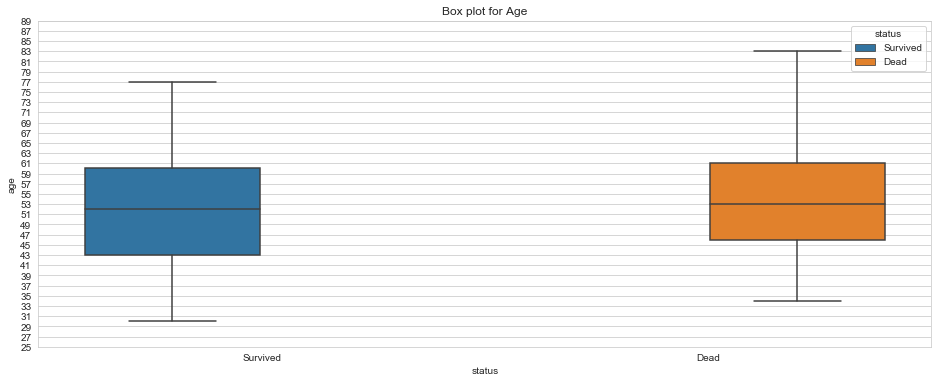

In [135]:
plt.figure(figsize=(16, 6))
sns.boxplot(x='status',y='age', data=habermandataset,hue='status')\
    .set(yticks=np.arange(25,90,2),title='Box plot for Age')
plt.show()

Box plot above shows all people between age 30 to 33 survived while all people of age 77 to 83 died.

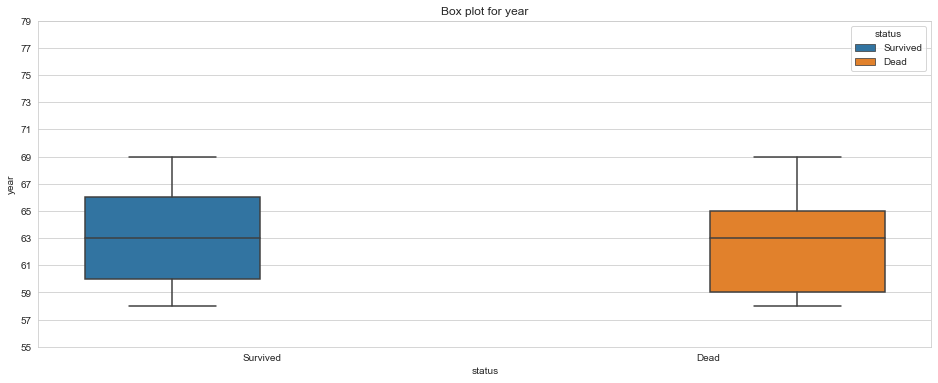

In [121]:
plt.figure(figsize=(16, 6))
sns.boxplot(x='status',y='year', data=habermandataset,hue='status')\
   .set(yticks=np.arange(55,80,2),title='Box plot for year')
plt.show()

In [84]:
h = habermandataset[habermandataset.year <=60]
print(h['status'].value_counts())
print()
h = habermandataset[habermandataset.year >=66]
print(h['status'].value_counts())

Survived    66
Dead        25
Name: status, dtype: int64

Survived    60
Dead        17
Name: status, dtype: int64


More than twice the number of people have survived as compared to people dead for years 58-60 and 
almost thrice the number of people have survived as compared to people dead for year 66 - 69

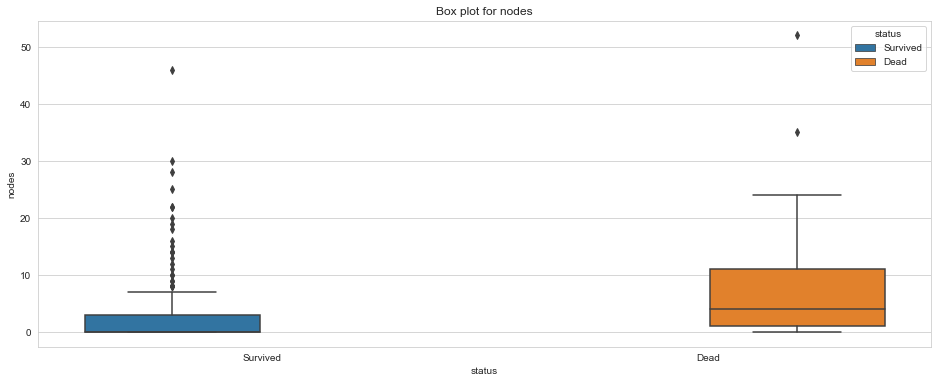

In [122]:
plt.figure(figsize=(16, 6))
ax = sns.boxplot(x='status',y='nodes', data=habermandataset,hue='status')\
        .set(title='Box plot for nodes')
plt.show()

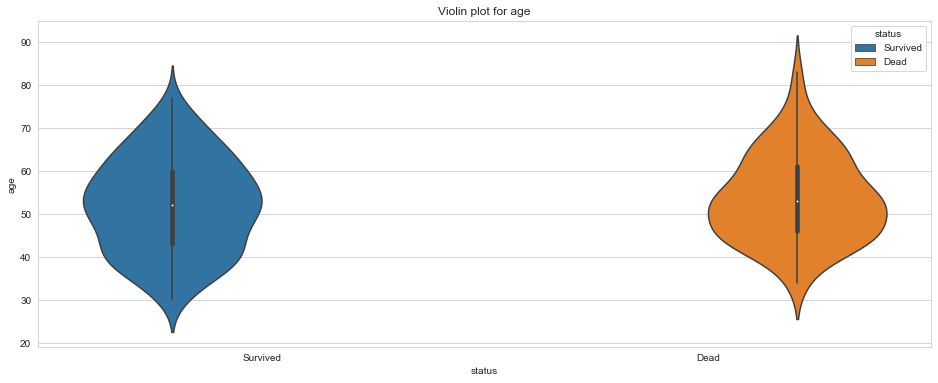

In [123]:
plt.figure(figsize=(16, 6))
sns.violinplot(x="status", y="age", data=habermandataset, size=8,hue='status')\
   .set(title='Violin plot for age')
plt.show()

As indicated above younger people have higher chances of survival

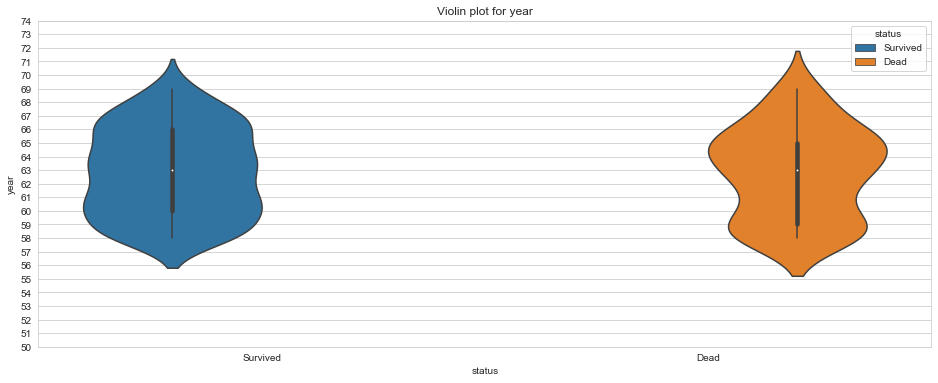

In [126]:
plt.figure(figsize=(16, 6))
sns.violinplot(x="status", y="year", data=habermandataset, size=8,hue='status')\
   .set(yticks=np.arange(50,75,1),title='Violin plot for year')
plt.show()

Year 59-61 has higher survival rate and 64-66 has higher death rate 

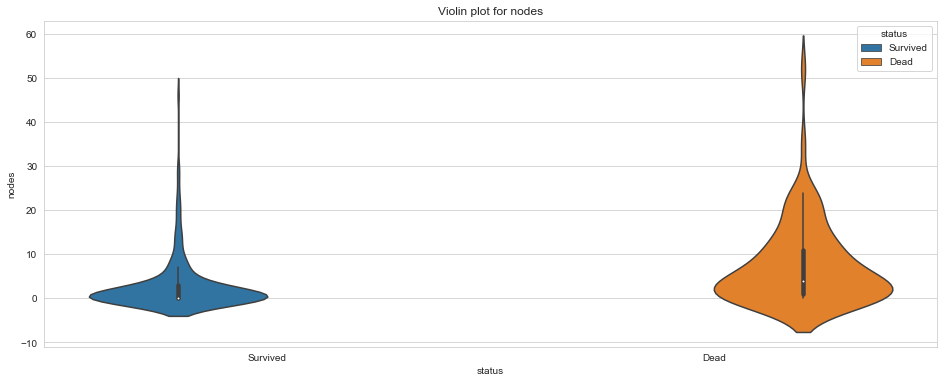

In [125]:
plt.figure(figsize=(16, 6))
sns.violinplot(x="status", y="nodes", data=habermandataset, size=8,hue='status')\
   .set(title='Violin plot for nodes')
plt.show()

Node value close to 0 has very high survival rate since thickness of plot is quite high in this area

# CONCLUSION

1. Features node and age have highest imapact on the survivability/death.
2. Younger people have higher chance of survival as compared to older.
3. Node value close to 0 guarantees higher chances of survival.
